In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#for ML preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
#neural network
from tensorflow import keras
from tensorflow.keras import layers
from keras import optimizers
#nerual net analysis
import shap
#random forest classifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV #for gridsearch of rf
#evaluation
from sklearn.metrics import r2_score

import MLACDS as dt

pd.set_option('display.max_columns', None)

Files with useable data:
'p0.1_N54/'
'p0.2_N54/'
'p0.3_N54/'

In [2]:
N_neighbours = 8 ### number of neighbours to be extracted

dires = ['p0.2_N54/'] #data we want to load for training

In [3]:
#### list with names to be used in the final dataframe
l_s = list(range(N_neighbours))
l_s_names = []
for i in l_s:
    l_s_names.append('l'+str(i))

In [4]:
### list of columns for bond order parameter
bo = list(range(N_neighbours))
bo_names = []
for i in bo:
    bo_names.append("bo"+str(i))

In [5]:
f_r_cut_vol = 4### cut off used for the local volume calculation
# radius of local volume spher 
#keep @ 4 too small too little neighbour

f_r_cut_sp = 30###A big number here means look for the closest 
                #neighbours
               ###For a small cut-off the number of neighbours
                #might not be the same for all particles


In [6]:
df = dt.load_data(dires, l_s, l_s_names, bo, bo_names, f_r_cut_vol, f_r_cut_sp, N_neighbours)

  0%|          | 0/100 [00:00<?, ?it/s]

/home/richard/Work/4th_Year_College/final_year_project/MLACDS/MLACDS.py:297: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df,df2],ignore_index=True)


(54, 8)
(54, 8)


In [7]:
df

l0        l1        l2        l3        l4        l5        l6  \
0     0.563190  0.565949  0.580143  0.707842  0.773975  0.834769  0.884115   
1     0.575812  0.590612  0.632228  0.649492  0.685031  0.731453  0.744061   
2     0.564883  0.575887  0.607135  0.613226  0.648257  0.651667  0.694666   
3     0.566483  0.583332  0.648028  0.700093  0.725940  0.791908  0.866125   
4     0.552615  0.566483  0.706214  0.773975  0.827710  0.847720  0.905372   
...        ...       ...       ...       ...       ...       ...       ...   
5395  0.614620  0.621393  0.658428  0.676909  0.698650  0.743611  0.803709   
5396  0.544488  0.611636  0.633573  0.705376  0.734750  0.821348  0.857511   
5397  0.614163  0.670857  0.734750  0.767399  0.781626  0.794275  0.840062   
5398  0.587466  0.591041  0.593595  0.608679  0.670857  0.729277  0.758259   
5399  0.591041  0.602678  0.653597  0.658428  0.691546  0.692011  0.804425   

            l7       bo0           bo1       bo2           bo3       bo4  \
0     0.888794  3.544908  1.009394e-17  0.035187  3.646431e-17  0.254532   
1     0.888794  3.544908  7.252131e-18  0.035187  3.590567e-17  0.254532   
2     0.906113  3.544908  1.063815e-17  0.035187  3.653650e-17  0.254532   
3     0.869910  3.544908  7.595735e-18  0.035187  3.633844e-17  0.254532   
4     0.916870  3.544908  4.767561e-18  0.035187  3.616554e-17  0.254532   
...        ...       ...           ...       ...           ...       ...   
5395  0.857511  3.544908  3.059538e-17  0.034166  3.328186e-17  0.253684   
5396  0.864222  3.544908  3.030363e-17  0.034166  3.317297e-17  0.253684   
5397  0.852348  3.544908  2.992687e-17  0.034166  3.313902e-17  0.253684   
5398  0.796437  3.544908  3.025256e-17  0.034166  3.306143e-17  0.253684   
5399  0.815197  3.544908  3.002128e-17  0.034166  3.311633e-17  0.253684   

               bo5       bo6           bo7       vol  n_neighbours        Ds  
0     6.767539e-17  0.083104  7.637651e-17  0.200455          53.0  0.367946  
1     6.602351e-17  0.083104  7.457234e-17  0.206035          53.0  0.405260  
2     6.499404e-17  0.083104  7.466443e-17  0.216181          53.0  0.411686  
3     6.607907e-17  0.083104  7.435893e-17  0.192773          53.0  0.387032  
4     6.605771e-17  0.083104  7.418424e-17  0.192975          53.0  0.346245  
...            ...       ...           ...       ...           ...       ...  
5395  4.976994e-17  0.078902  7.386497e-17  0.215685          53.0  0.393998  
5396  4.979619e-17  0.078902  7.383386e-17  0.198661          53.0  0.386789  
5397  4.981818e-17  0.078902  7.372116e-17  0.201818          53.0  0.374940  
5398  4.980164e-17  0.078902  7.381448e-17  0.238355          53.0  0.415230  
5399  4.985364e-17  0.078902  7.380279e-17  0.185016          53.0  0.422381  

[5400 rows x 19 columns]

## Data Preprocessing

In [15]:
data = df.iloc[:,:-1]

In [21]:
target = df.Ds

In [22]:
#splitting the data to train and test
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=13, test_size=0.4)

In [23]:
#scaling data based on training set to prevent data leakage, the scaler computed from training set statistics will be applied to test data
scaler = preprocessing.StandardScaler().fit(X_train)

In [24]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## NN Model

In [54]:
#the first nn model. This contains:
model = keras.Sequential([
    layers.Dense(32, input_shape=(18,), activation="relu"), #input layer
    layers.Dense(16, activation="relu"), #first hidden layer less nodes
    layers.Dropout(0.5), #dropout layer with 50% dropout to prevent overfitting
    layers.Dense(1) #output layer, no activation function as must be continuous
])

In [55]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                608       
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 dense_14 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


In [61]:
# Compile the second model
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.01),
                loss='mse',
                metrics=['mae'])

In [62]:
#train the model (this takes a little while)
history = model.fit(X_train_scaled, y_train,
                    epochs=100, 
                    batch_size=32,
                    validation_data=(X_test_scaled, y_test))

Epoch 1/100
102/102 [==============================] - 1s 5ms/step - loss: 8.2280e-04 - mae: 0.0192 - val_loss: 2.3765e-04 - val_mae: 0.0122
Epoch 2/100
102/102 [==============================] - 0s 4ms/step - loss: 4.2642e-04 - mae: 0.0157 - val_loss: 7.2675e-04 - val_mae: 0.0198
Epoch 3/100
102/102 [==============================] - 0s 3ms/step - loss: 4.2743e-04 - mae: 0.0155 - val_loss: 3.1678e-04 - val_mae: 0.0142
Epoch 4/100
102/102 [==============================] - 0s 5ms/step - loss: 3.7362e-04 - mae: 0.0145 - val_loss: 2.3788e-04 - val_mae: 0.0114
Epoch 5/100
102/102 [==============================] - 0s 4ms/step - loss: 3.5849e-04 - mae: 0.0142 - val_loss: 9.4098e-05 - val_mae: 0.0080
Epoch 6/100
102/102 [==============================] - 1s 7ms/step - loss: 3.1874e-04 - mae: 0.0134 - val_loss: 2.5881e-04 - val_mae: 0.0127
Epoch 7/100
102/102 [==============================] - 0s 3ms/step - loss: 3.0014e-04 - mae: 0.0129 - val_loss: 1.2711e-04 - val_mae: 0.0082
Epoch 8/100
1

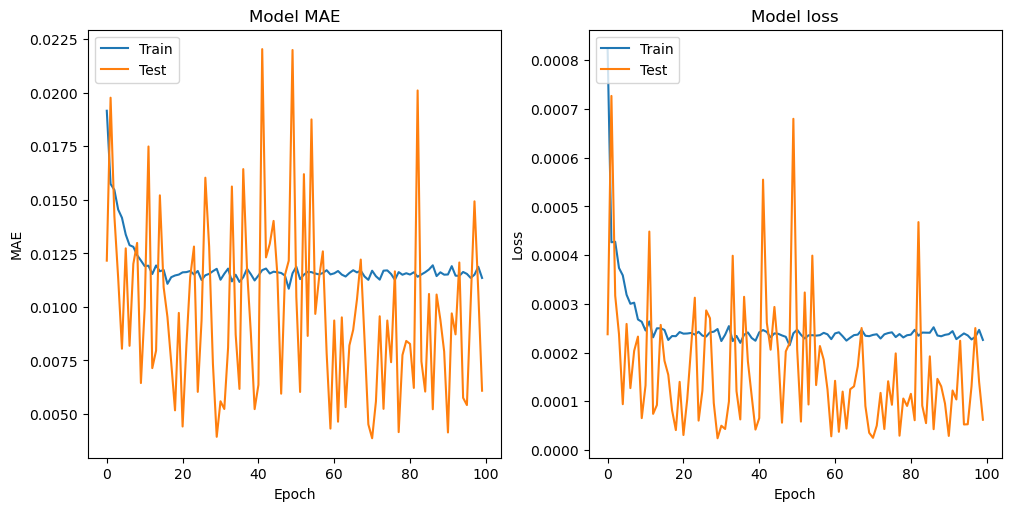

In [82]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10,5), layout="constrained", sharex=True)

axs[0].plot(history.history['mae'])
axs[0].plot(history.history['val_mae'])
axs[0].set_title('Model MAE')
axs[0].set_ylabel('MAE')
axs[0].set_xlabel('Epoch')
axs[0].legend(['Train', 'Test'], loc='upper left')

axs[1].plot(history.history['loss']) 
axs[1].plot(history.history['val_loss']) 
axs[1].set_title('Model loss') 
axs[1].set_ylabel('Loss') 
axs[1].set_xlabel('Epoch') 
axs[1].legend(['Train', 'Test'], loc='upper left') 

plt.show()

In [79]:
y_pred_nn = model.predict(X_test_scaled).ravel()

68/68 [==============================] - 0s 2ms/step


In [96]:
nn_r2 = r2_score(y_test, y_pred_nn)
print("NN Model R2:", nn_r2)

NN Model R2: 0.9098311223761092


## Random Forest

In [99]:
#gridsearch to give good challenge to neural net

# params = {
#     "n_estimators":[100,200,300],
#     "criterion":("squared_error", "poisson"),
#     "max_depth":[6,10,12,14]
#          } 

# rf = RandomForestRegressor()

# clf = GridSearchCV(rf, params, verbose=1)

In [100]:
#fitting the model
# clf.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ('squared_error', 'poisson'),
                         'max_depth': [6, 10, 12, 14],
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [101]:
# clf.best_params_

{'criterion': 'squared_error', 'max_depth': 14, 'n_estimators': 300}

In [105]:
#run this cell instead of the gridsearch to save alot of time.
clf = RandomForestRegressor(criterion="squared_error",\
max_depth=14, n_estimators=300)

clf.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=14, n_estimators=300)

In [103]:
#predictions
y_pred_rf = clf.predict(X_test_scaled)

In [104]:
rf_r2 = r2_score(y_test, y_pred_rf)
print("RF Model R2:", rf_r2)

RF Model R2: 0.9705029823008808
